<a href="https://colab.research.google.com/github/MichelBMachado/MAC024/blob/main/Presa_Predador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Modelo sem inseticida


$
\begin{array}{rlc}
C_{n+1} = C_n + k_0C_n - k_1B_nC_n \\
B_{n+1} = B_n - k_2B_n + k_3B_nC_n
\end{array}
$

**Quais suposições estão sendo implicitamente feitas sobre o crescimento de cada espécie na ausência das outras espécies?** Supõem-se que a população do inseto do algodão cresce na ausência do seu predador, o besouro-joaninha enquanto que a população do besouro-joaninha decresce na ausência de seu alimento, o inseto do algodão.

Constantes da simulção

In [ ]:
k_0 = 0.6      #Taxa de crescimento do inseto do algodão(Cn)
k_1 = 0.004    #Taxa de decrescimento do inseto do algodão devido a predação
k_2 = 0.1      #Taxa de crescimento do besouro-joaninha(Bn)
k_3 = 0.001    #Taxa de crescimento do besouro-joaninha devido a predação

Resolução do sistema

**Determine os pontos fixos do sistema predador-presa. Considere (k0, k1, k2, k3) = (0.6,0.004,0.1,0.001) como parametros do modelo.** Com a resolução do sistema de equações para os parâmetros acima obtemos os pontos fixos 100 e 150 para o inseto e para o besouro-joaninha respectivamente.

In [ ]:
import sympy as sp                                        #Importação da biblioteca de computação simbólica
C, B = sp.var('C B')                                      #Variáveis simbólicas das populações

lado_esquerdo = [C, B]       
lado_direito = [C + k_0*C - k_1*B*C, B - k_2*B + k_3*B*C]
sistema = [0,0]

for i in range(0,2):
  sistema[i] = lado_esquerdo[i] - lado_direito[i]

sp.solve(sistema, (C,B), dict=True)

[{B: 0.0, C: 0.0}, {B: 150.000000000000, C: 100.000000000000}]

Evolução do sistema

In [ ]:
import numpy as np

def evolui_sistema(x_0, k, n):
  k_0, k_1, k_2, k_3 = k                      #Atribuição das constantes
  x = np.zeros((n, 2))                        #Criação da matriz para armazenar os valores da função
  x[0,0] = x_0[0]                             #Atribuição das condições iniciais na matriz
  x[0,1] = x_0[1]
  
  for i in range(0, n - 1):
    x[i + 1, 0] = x[i, 0] + k_0*x[i, 0] - k_1*x[i, 0]*x[i, 1]
    x[i + 1, 1] = x[i, 1] - k_2*x[i, 1] + k_3*x[i, 1]*x[i, 0]
  
  return (x)

Plotagem dos gráficos

In [ ]:
import pylab as pl

def plota_grafico(x_0, x):
    pl.plot(x[:,0], label=u'Inseto do algodão')
    pl.plot(x[:,1], label=u'Besouro-joaninha')
    pl.title(u'Condições iniciais: $(C_0, B_0) $ = ('+str(x_0[0])+ ', '+str(x_0[1])+')')
    pl.legend()
    pl.show()

Código principal

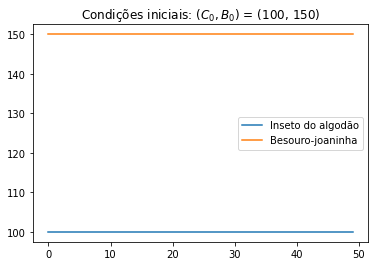

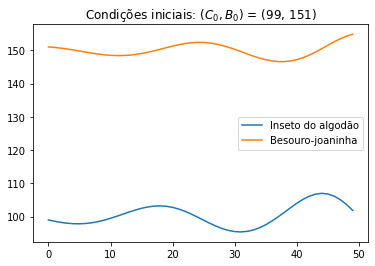

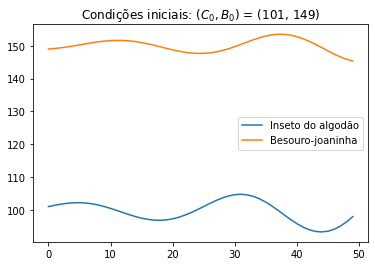

In [ ]:
x_0 = [100, 150]                      #Condições iniciais da simulação
k = [k_0, k_1, k_2, k_3]              #Constantes relacionadas a crescimento e predação
n = 50                                #Número de iterações
x = evolui_sistema(x_0, k, n)
plota_grafico(x_0, x)

x_0 = [99, 151]                       #Condições iniciais da simulação
k = [k_0, k_1, k_2, k_3]              #Constantes relacionadas a crescimento e predação
n = 50                                #Número de iterações
x = evolui_sistema(x_0, k, n)
plota_grafico(x_0, x)

x_0 = [101, 149]                      #Condições iniciais da simulação
k = [k_0, k_1, k_2, k_3]              #Constantes relacionadas a crescimento e predação
n = 50                                #Número de iterações
x = evolui_sistema(x_0, k, n)
plota_grafico(x_0, x)

#### Modelo com inseticida





**Modifique o modelo para refletir um sistema predador-presa em que os agricultores aplicam (com regularidade) um inseticida que destrói tanto o predador do inseto quanto a presa do inseto a uma taxa proporcional aos numeros presentes. Escolha adequadamente os novos parâmetros do modelo, se assim for necessario.** Foi incluido um termo em cada equação de populção, este termo é dado pela multiplicação de uma constante que representa a taxa de mortalidade de cada espécie devido a ação do inseticida pela população da espécie no momento. A nova população é dada pela subtração da população anterior por este termo.

$
\begin{array}{rlc}
C_{n+1} = C_n + k_0C_n - k_1B_nC_n -k_4C_n \\
B_{n+1} = B_n - k_2B_n + k_3B_nC_n -k_5B_n
\end{array}
$

Constantes da simulação

In [ ]:
k_0 = 0.6      #Taxa de crescimento do inseto do algodão(Cn)
k_1 = 0.004    #Taxa de decrescimento do inseto do algodão devido a predação
k_2 = 0.1      #Taxa de crescimento do besouro-joaninha(Bn)
k_3 = 0.001    #Taxa de crescimento do besouro-joaninha devido a predação
k_4 = 0.5     #Taxa de mortalidade do inseto do algodão devido ao inseticida
k_5 = 0.5     #Taxa de mortalidade do besouro-joaninha devido ao inseticida

**Determine os pontos fixos do sistema predador-presa em que os agricultores aplicam inseticida.** Os pontos fixos foram obtidos da mesma forma do modelo sem a utilização do inseticida, utilizando computação simbólica e são apresentados abaixo.

Resolução do sistema

In [ ]:
import sympy as sp    #Importação da biblioteca de computação simbólica

C, B = sp.var('C B')  #Variáveis simbólicas das populações

lado_esquerdo = [C, B]
lado_direito = [C + k_0*C - k_1*B*C - k_4*C, B - k_2*B + k_3*B*C - k_5*B]
sistema = [0,0]

for i in range(0, 2):
  sistema[i] = lado_esquerdo[i] - lado_direito[i]

sp.solve(sistema, (C, B) ,dict = True)  #Resolução do sistema e obtenção dos pontos fixos

[{B: 0.0, C: 0.0}, {B: 25.0000000000000, C: 600.000000000000}]

Evolução do sistema

In [ ]:
import numpy as np

def evolui_sistema(x_0, k, n):
  k_0, k_1, k2_, k_3, k_4, k_5 = k              #Atribuição das constantes
  x = np.zeros((n, 2))                          #Criação da matriz para armazenar os valores da função
  x[0,0] = x_0[0]                               #Atribuição das condições iniciais na matriz
  x[0,1] = x_0[1]
  
  for i in range(0, n - 1):
    x[i + 1, 0] = x[i, 0] + k_0*x[i, 0] - k_1*x[i, 0]*x[i, 1] -k_4*x[i, 0]
    x[i + 1, 1] = x[i, 1] - k_2*x[i, 1] + k_3*x[i, 1]*x[i, 0] -k_5*x[i, 1]
  
  return (x)

Plotagem dos gráficos

In [ ]:
import pylab as pl

def plota_grafico(x_0, x):
    pl.plot(x[:,0], label=u'Inseto do algodão')
    pl.plot(x[:,1], label=u'Besouro-joaninha')
    pl.title(u'Condições iniciais: $(C_0, B_0) $ = ('+str(x_0[0])+ ', '+str(x_0[1])+')')
    pl.legend()
    pl.show()

Código principal

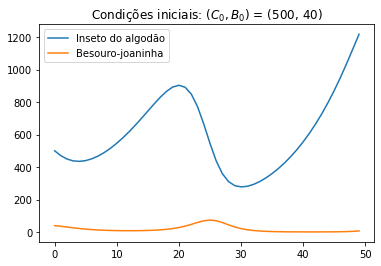

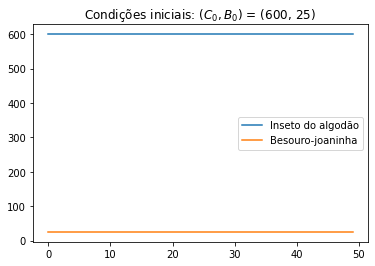

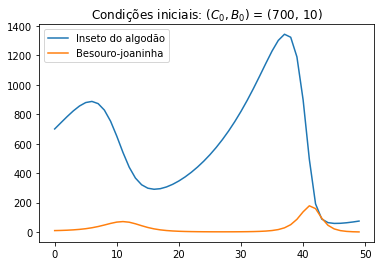

In [ ]:
x_0 = [500, 40]                      #Condições iniciais da simulação
k = [k_0, k_1, k_2, k_3, k_4, k_5]    #Constantes relacionadas a crescimento e predação
n = 50                                #Número de iterações
x = evolui_sistema(x_0, k, n)
plota_grafico(x_0, x)

x_0 = [600, 25]                      #Condições iniciais da simulação
k = [k_0, k_1, k_2, k_3, k_4, k_5]    #Constantes relacionadas a crescimento e predação
n = 50                                #Número de iterações
x = evolui_sistema(x_0, k, n)
plota_grafico(x_0, x)

x_0 = [700, 10]                      #Condições iniciais da simulação
k = [k_0, k_1, k_2, k_3, k_4, k_5]    #Constantes relacionadas a crescimento e predação
n = 50                                #Número de iterações
x = evolui_sistema(x_0, k, n)
plota_grafico(x_0, x)